<a href="https://colab.research.google.com/github/manimegalai1701/Manimegalai/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [2]:
#loading the datasets
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#access the data attributes
dataset=boston.data
for name, index in enumerate(boston.feature_names):
  print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [0]:
#reshaping data
data=dataset[:,12].reshape(-1,1)

In [5]:
#shape of the data
np.shape(dataset)


(506, 13)

In [0]:
#target values
target=boston.target.reshape(-1,1)

In [7]:
#shape of target
np.shape(target)

(506, 1)

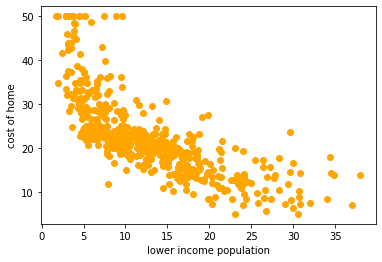

In [8]:
%matplotlib inline
plt.scatter(data,target,color='orange')
plt.xlabel('lower income population')
plt.ylabel('cost of home')
plt.show()

In [9]:
#regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#prediction
pred=regression.predict(data)

In [11]:
pred

array([[29.8225951 ],
       [25.87038979],
       [30.72514198],
       [31.76069578],
       [29.49007782],
       [29.60408375],
       [22.74472741],
       [16.36039575],
       [ 6.11886372],
       [18.30799693],
       [15.1253316 ],
       [21.94668596],
       [19.62856553],
       [26.70643322],
       [24.80633451],
       [26.50692285],
       [28.30251613],
       [20.61661686],
       [23.44776393],
       [23.83728417],
       [14.58380346],
       [21.41465832],
       [16.76891698],
       [15.66685973],
       [19.06803641],
       [18.86852605],
       [20.48360995],
       [18.13698805],
       [22.39320915],
       [23.17224962],
       [13.08272548],
       [22.16519731],
       [ 8.22797329],
       [17.12043524],
       [15.22983702],
       [25.35736314],
       [23.71377775],
       [26.22190805],
       [24.92984093],
       [30.44962767],
       [32.67274316],
       [29.95560201],
       [29.03405413],
       [27.48547369],
       [25.48086955],
       [24

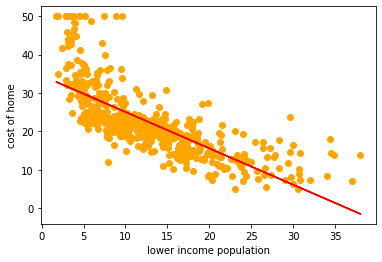

In [12]:
%matplotlib inline
plt.scatter(data,target,color='orange')
plt.plot(data,pred,color='red')
plt.xlabel('lower income population')
plt.ylabel('cost of home')
plt.show()

In [0]:
#circumventing curve inline using polynomial model
from sklearn.preprocessing import PolynomialFeatures
#to allow merging of models
from sklearn.pipeline import make_pipeline

In [0]:
model=make_pipeline(PolynomialFeatures(3),regression)

In [16]:
model.fit(data,target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
pred=model.predict(data)

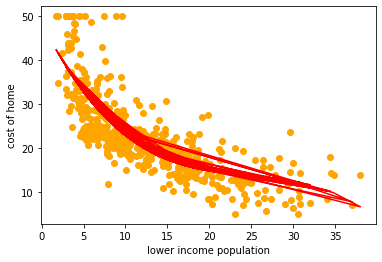

In [18]:
%matplotlib inline
plt.scatter(data,target,color='orange')
plt.plot(data,pred,color='red')
plt.xlabel('lower income population')
plt.ylabel('cost of home')
plt.show()

In [0]:
#r_2 metrics
from sklearn.metrics import r2_score


In [20]:
#predict
r2_score(pred,target)

0.47989118102738904